<a href="https://colab.research.google.com/github/F1D02310092/ai/blob/main/tubesAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pembersihan Data Awal

Langkah ini bertujuan untuk memuat dataset dan melakukan pembersihan awal dengan menghapus kolom yang tidak relevan atau berpotensi menyebabkan bias dalam model.

1.  **Memuat Dataset**: Mengimpor file CSV ke dalam DataFrame pandas.
2.  **Menampilkan Info Awal**: Memeriksa bentuk dan nama kolom DataFrame sebelum perubahan.
3.  **Menghapus Kolom `id`**: Kolom ini seringkali merupakan pengidentifikasi unik yang tidak memberikan informasi prediktif dan dapat menyebabkan overfitting.
4.  **Menghapus Kolom `HttpsInHostname`**: Kolom ini diidentifikasi memiliki nilai konstan, yang berarti tidak ada variasi dan tidak akan berkontribusi pada pembelajaran model.
5.  **Menampilkan Hasil Pembersihan**: Memverifikasi bahwa kolom-kolom telah berhasil dihapus dan melihat beberapa baris pertama dari DataFrame yang sudah dibersihkan.

In [1]:
import pandas as pd

# Muat dataset dari file CSV yang diunggah
df = pd.read_csv('/content/Phishing_Legitimate_full_COPY.csv')

# Tampilkan bentuk awal dan kolom DataFrame untuk verifikasi
print("Bentuk DataFrame asli:", df.shape)
print("Kolom DataFrame asli:", df.columns.tolist())

# Hapus kolom 'id' karena rawan bias dan tidak relevan untuk pemodelan
df = df.drop('id', axis=1)

# Hapus kolom 'HttpsInHostname' karena nilainya konstan dan tidak memberikan informasi yang berguna
df = df.drop('HttpsInHostname', axis=1)

# Tampilkan bentuk baru DataFrame dan 5 baris pertamanya untuk memverifikasi perubahan
print("\nBentuk DataFrame setelah dibersihkan:", df.shape)
display(df.head())

Bentuk DataFrame asli: (10000, 50)
Kolom DataFrame asli: ['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'CLASS_LABEL']

Bentuk DataFrame setel

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


### Analisis Korelasi Fitur dengan Mutual Information (MI)

Langkah ini bertujuan untuk mengukur seberapa besar ketergantungan antara setiap fitur independen dengan variabel target (`CLASS_LABEL`). Metode Mutual Information (MI) digunakan karena dapat menangkap hubungan non-linear antar variabel, yang seringkali tidak dapat ditangkap oleh metode korelasi linear seperti Pearson.

1.  **Memisahkan Fitur dan Target**: Memisahkan DataFrame menjadi fitur (`X`) dan variabel target (`y`).
2.  **Menghitung Mutual Information**: Menggunakan `mutual_info_classif` dari pustaka `sklearn` untuk menghitung skor MI antara setiap fitur dan `CLASS_LABEL`.
3.  **Menampilkan Hasil**: Mengurutkan dan menampilkan skor MI, menunjukkan fitur-fitur yang paling informatif terhadap `CLASS_LABEL`.

### Interpretasi Mutual Information (MI)

Mutual Information (MI) adalah ukuran yang menggambarkan seberapa banyak informasi yang dibagikan (atau ketergantungan) antara dua variabel. Dalam konteks analisis fitur, MI mengukur seberapa banyak informasi yang diberikan oleh suatu fitur tentang variabel target (dalam kasus ini, `CLASS_LABEL` yang menunjukkan apakah sebuah website adalah phishing atau tidak).

**Bagaimana Menginterpretasi Skor MI:**

*   **Skor MI yang Lebih Tinggi**: Menunjukkan bahwa fitur tersebut memiliki ketergantungan yang lebih kuat atau lebih banyak informasi yang dibagikan dengan `CLASS_LABEL`. Fitur-fitur dengan skor MI tinggi cenderung lebih relevan dan berpotensi menjadi prediktor yang baik untuk model. Mereka sangat membantu dalam membedakan antara website phishing dan non-phishing.
*   **Skor MI yang Lebih Rendah (Mendekati Nol)**: Menunjukkan bahwa fitur tersebut memiliki sedikit atau tidak ada ketergantungan dengan `CLASS_LABEL`. Fitur-fitur ini mungkin kurang informatif dan kontribusinya terhadap model prediksi akan minimal. Dalam beberapa kasus, fitur dengan skor MI yang sangat rendah bisa dipertimbangkan untuk dihapus guna menyederhanakan model.

**Keunggulan MI:**

*   **Menangkap Hubungan Non-Linear**: Tidak seperti korelasi Pearson yang hanya mengukur hubungan linear, MI dapat menangkap segala jenis ketergantungan (linear maupun non-linear) antara fitur dan target.
*   **Tidak Memerlukan Asumsi Distribusi**: MI adalah metode non-parametrik, sehingga tidak memerlukan asumsi tentang distribusi data.

**Penting untuk Dicatat:**

*   Meskipun MI menunjukkan ketergantungan, ia **tidak menunjukkan arah hubungan** (positif atau negatif) seperti korelasi linear. Ia hanya mengukur kekuatan hubungan.
*   MI **tidak menyiratkan hubungan sebab-akibat** (kausalitas), hanya keterkaitan statistik.

In [2]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Memisahkan fitur (X) dan target (y)
X = df.drop('CLASS_LABEL', axis=1)
y = df['CLASS_LABEL']

# Menghitung Mutual Information
# Menggunakan random_state untuk hasil yang dapat direproduksi
mi_scores = mutual_info_classif(X, y, random_state=42)

# Membuat DataFrame untuk menampilkan skor MI
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Mengurutkan fitur berdasarkan skor MI secara menurun
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Menampilkan hasil
print("Skor Mutual Information (MI) untuk setiap fitur terhadap CLASS_LABEL:")
display(mi_df)

Skor Mutual Information (MI) untuk setiap fitur terhadap CLASS_LABEL:


,Feature,MI Score
25,PctExtHyperlinks,0.467207
26,PctExtResourceUrls,0.292570
32,PctNullSelfRedirectHyperlinks,0.237512
46,PctExtNullSelfRedirectHyperlinksRT,0.209041
13,NumNumericChars,0.127454
45,ExtMetaScriptLinkRT,0.123565
33,FrequentDomainNameMismatch,0.122900
4,NumDash,0.114549
37,SubmitInfoToEmail,0.087544
0,NumDots,0.070521


### Penghapusan Fitur dengan Mutual Information (MI) Nol

Setelah melakukan analisis Mutual Information (MI), teridentifikasi beberapa fitur yang memiliki skor MI 0.0000 terhadap variabel target (`CLASS_LABEL`). Langkah ini bertujuan untuk secara permanen menghapus fitur-fitur tersebut dari dataset.

**Mengapa Fitur dengan MI Nol Dihapus?**

1.  **Tidak Informatif**: Skor MI nol (atau sangat mendekati nol) menunjukkan bahwa fitur tersebut tidak memiliki ketergantungan statistik dengan variabel target. Dengan kata lain, mengetahui nilai dari fitur-fitur ini tidak memberikan informasi tambahan apa pun untuk memprediksi apakah sebuah website adalah phishing atau tidak.
2.  **Mengurangi "Noise"**: Fitur yang tidak informatif dapat dianggap sebagai "noise" dalam dataset. Mempertahankan fitur-fitur ini dapat mengalihkan perhatian model dari pola-pola yang lebih relevan dan berpotensi memperburuk kinerja atau memperlambat proses pelatihan.
3.  **Penyederhanaan Model**: Menghapus fitur yang tidak relevan mengurangi dimensi dataset, menghasilkan model yang lebih sederhana, lebih mudah diinterpretasikan, dan lebih cepat untuk dilatih. Ini juga dapat membantu mengurangi risiko *overfitting*.
4.  **Efisiensi Komputasi**: Dengan lebih sedikit fitur, operasi komputasi (pelatihan model, validasi, dll.) akan berjalan lebih efisien, menghemat waktu dan sumber daya.

**Kekhawatiran dan Justifikasi dalam Konteks Random Forest (RF):**

Ada kekhawatiran yang wajar bahwa penghapusan fitur mungkin mengkompromikan kinerja model canggih seperti Random Forest, yang dikenal kemampuannya menangani interaksi fitur dan toleransinya terhadap fitur yang kurang relevan. Namun, untuk fitur dengan MI 0.0000, justifikasinya tetap kuat:

*   **Interaksi yang Tidak Bermakna**: Meskipun RF dapat menemukan interaksi antar fitur, sebuah fitur yang secara individual tidak informatif (MI = 0) sangat tidak mungkin untuk membentuk interaksi yang bermakna atau signifikan dengan fitur lain. Jika fitur tersebut tidak membawa informasi intrinsik tentang target, kemampuannya untuk berinteraksi secara prediktif juga akan nol atau sangat mendekati nol.
*   **Pemilihan Fitur Internal RF**: Pohon keputusan di dalam Random Forest akan secara otomatis mencoba mencari fitur terbaik untuk pembelahan. Fitur dengan MI 0.0000 tidak akan pernah dipilih sebagai kandidat pembelahan yang baik karena tidak akan meningkatkan *information gain* atau mengurangi *impurity* node. Dengan menghapusnya, kita hanya membantu RF untuk tidak membuang waktu dan sumber daya komputasi untuk mengevaluasi fitur yang memang tidak relevan.
*   **Fokus pada Sinyal Kuat**: Penghapusan fitur yang 'mati' ini memastikan bahwa Random Forest dapat sepenuhnya fokus pada fitur-fitur yang memiliki sinyal prediktif, baik secara individual maupun dalam kombinasi. Hal ini dapat menghasilkan model yang lebih bersih dan berkinerja lebih baik.

Dengan demikian, penghapusan fitur-fitur dengan skor MI 0.0000 adalah keputusan yang kuat dan beralasan, yang akan mengoptimalkan dataset Anda untuk pelatihan model deteksi phishing.

In [3]:
import pandas as pd

# Identifikasi kolom-kolom dengan skor MI 0.0000
# Diasumsikan mi_df sudah ada dari langkah sebelumnya
columns_to_drop_mi = mi_df[mi_df['MI Score'] == 0.0000]['Feature'].tolist()

print(f"Kolom yang akan dihapus berdasarkan MI = 0.0000: {columns_to_drop_mi}")

# Simpan bentuk DataFrame sebelum penghapusan
initial_shape = df.shape
print(f"Bentuk DataFrame sebelum penghapusan fitur dengan MI nol: {initial_shape}")

# Hapus kolom-kolom yang teridentifikasi dari DataFrame utama
df_cleaned_mi = df.drop(columns=columns_to_drop_mi, axis=1)

# Tampilkan bentuk baru DataFrame dan 5 baris pertamanya untuk memverifikasi perubahan
final_shape = df_cleaned_mi.shape
print(f"Bentuk DataFrame setelah penghapusan fitur dengan MI nol: {final_shape}")
display(df_cleaned_mi.head())

# Perbarui df ke df_cleaned_mi untuk langkah selanjutnya
df = df_cleaned_mi

Kolom yang akan dihapus berdasarkan MI = 0.0000: ['AtSymbol', 'NumHash', 'ImagesOnlyInForm']
Bentuk DataFrame sebelum penghapusan fitur dengan MI nol: (10000, 48)
Bentuk DataFrame setelah penghapusan fitur dengan MI nol: (10000, 45)


,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,2,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0,1,1,-1,0,-1,-1,1


### Pembagian Data (Data Splitting)

Langkah ini merupakan fondasi penting dalam proses pengembangan model *machine learning*. Tujuannya adalah untuk membagi dataset yang telah dibersihkan menjadi subset-subset yang berbeda untuk tujuan pelatihan dan evaluasi model. Pembagian data yang tepat memastikan bahwa model yang dilatih tidak hanya bekerja baik pada data yang dilihatnya selama pelatihan (tidak *overfit*), tetapi juga dapat bergeneralisasi dengan baik pada data baru yang belum pernah dilihat sebelumnya.

1.  **Memisahkan Fitur dan Target**: Pertama, kita akan memisahkan kolom fitur (semua kolom kecuali `CLASS_LABEL`) ke dalam variabel `X` dan variabel target (`CLASS_LABEL`) ke dalam variabel `y`.
2.  **Membagi Data menjadi Training dan Testing Set**: Menggunakan fungsi `train_test_split` dari pustaka `sklearn.model_selection`, dataset akan dibagi menjadi:
    *   **Training Set (X_train, y_train)**: Bagian data ini akan digunakan untuk melatih model Random Forest. Model akan mempelajari pola dan hubungan dari fitur-fitur di `X_train` untuk memprediksi `y_train`.
    *   **Testing Set (X_test, y_test)**: Bagian data ini akan digunakan untuk mengevaluasi kinerja model setelah pelatihan. Model tidak pernah 'melihat' data ini selama pelatihan, sehingga memberikan indikasi yang objektif tentang seberapa baik model dapat bekerja pada data baru.

**Parameter Penting `train_test_split`:**

*   `test_size`: Menentukan proporsi data yang akan dialokasikan untuk *testing set*. Umumnya 20-30% digunakan untuk *testing set*.
*   `random_state`: Sebuah *seed* untuk pengacakan. Mengatur nilai ini memastikan bahwa pembagian data Anda akan konsisten dan dapat direproduksi setiap kali kode dijalankan.
*   `stratify`: Parameter ini sangat penting untuk masalah klasifikasi, terutama jika kelas target memiliki ketidakseimbangan (imbalance). `stratify=y` akan memastikan bahwa rasio proporsi kelas target (`CLASS_LABEL`) yang sama dipertahankan di *training set* maupun *testing set*. Ini mencegah satu set memiliki terlalu banyak atau terlalu sedikit sampel dari salah satu kelas, yang dapat menyebabkan bias dalam pelatihan atau evaluasi.

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Memisahkan fitur (X) dan target (y)
X = df.drop('CLASS_LABEL', axis=1)
y = df['CLASS_LABEL']

# Membagi data menjadi training dan testing set
# Menggunakan test_size=0.2 (20% untuk testing), random_state untuk reproduktifitas,
# dan stratify=y untuk menjaga proporsi kelas target di kedua set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan bentuk (shape) dari masing-masing set untuk verifikasi
print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("Bentuk y_train:", y_train.shape)
print("Bentuk y_test:", y_test.shape)

# Memverifikasi proporsi kelas di training dan testing set (opsional)
print("\nProporsi kelas di y_train:\n", y_train.value_counts(normalize=True))
print("\nProporsi kelas di y_test:\n", y_test.value_counts(normalize=True))

Bentuk X_train: (8000, 44)
Bentuk X_test: (2000, 44)
Bentuk y_train: (8000,)
Bentuk y_test: (2000,)

Proporsi kelas di y_train:
 CLASS_LABEL
0    0.5
1    0.5
Name: proportion, dtype: float64

Proporsi kelas di y_test:
 CLASS_LABEL
0    0.5
1    0.5
Name: proportion, dtype: float64


### Pelatihan Model Random Forest

Setelah data dibagi menjadi *training set* dan *testing set*, langkah selanjutnya adalah melatih model *machine learning*. Dalam kasus ini, kita akan melatih model Random Forest menggunakan data pelatihan (`X_train` dan `y_train`).

**Random Forest** adalah algoritma pembelajaran ensambel yang membangun banyak pohon keputusan selama waktu pelatihan dan mengeluarkan kelas yang merupakan modus (klasifikasi) atau prediksi rata-rata (regresi) dari prediksi masing-masing pohon.

**Langkah-langkah:**

1.  **Mengimpor `RandomForestClassifier`**: Mengimpor kelas `RandomForestClassifier` dari modul `sklearn.ensemble`.
2.  **Inisialisasi Model**: Membuat instance dari `RandomForestClassifier`. Penting untuk menetapkan `random_state` untuk memastikan hasil yang dapat direproduksi.
3.  **Melatih Model**: Menggunakan metode `.fit()` pada instance model, yang akan melatih model dengan `X_train` (fitur pelatihan) dan `y_train` (label target pelatihan). Selama proses ini, model akan belajar pola dan hubungan dalam data untuk membuat prediksi yang akurat.

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest Classifier
# random_state diatur untuk reproduktifitas hasil
model_rf = RandomForestClassifier(random_state=42)

# Latih model menggunakan data training
model_rf.fit(X_train, y_train)

print("Model Random Forest berhasil dilatih.")

Model Random Forest berhasil dilatih.


### Evaluasi Model Random Forest

Setelah model Random Forest dilatih, langkah krusial berikutnya adalah mengevaluasi seberapa baik performanya dalam membuat prediksi pada data yang belum pernah dilihatnya (`testing set`). Evaluasi ini penting untuk memahami kekuatan dan kelemahan model.

Kami akan menggunakan metrik-metrik berikut:

1.  **Matriks Konfusi (Confusion Matrix)**:
    *   Sebuah tabel yang merangkum performa algoritma klasifikasi. Setiap baris matriks mewakili *kelas sebenarnya* (actual class) dan setiap kolom mewakili *kelas yang diprediksi* (predicted class).
    *   **True Positive (TP)**: Jumlah prediksi positif yang benar.
    *   **True Negative (TN)**: Jumlah prediksi negatif yang benar.
    *   **False Positive (FP)**: Jumlah prediksi positif yang salah (Type I error).
    *   **False Negative (FN)**: Jumlah prediksi negatif yang salah (Type II error).

2.  **Akurasi (Accuracy)**:
    *   Proporsi prediksi yang benar dari total prediksi. Akurasi tinggi menunjukkan model yang baik secara keseluruhan.
    *   `Akurasi = (TP + TN) / (TP + TN + FP + FN)`

3.  **Presisi (Precision)**:
    *   Proporsi prediksi positif yang benar dari total prediksi positif. Penting ketika biaya *false positive* tinggi.
    *   `Presisi = TP / (TP + FP)`

4.  **Recall (Sensitivity)**:
    *   Proporsi kasus positif yang benar-benar diidentifikasi oleh model. Penting ketika biaya *false negative* tinggi.
    *   `Recall = TP / (TP + FN)`

5.  **F1-Score**:
    *   Rata-rata harmonik dari presisi dan recall. Ini adalah metrik yang baik untuk digunakan ketika ada ketidakseimbangan kelas.
    *   `F1-Score = 2 * (Presisi * Recall) / (Presisi + Recall)`


Akurasi Model: 0.9850
Presisi Model: 0.9869
Recall Model: 0.9830
F1-Score Model: 0.9850


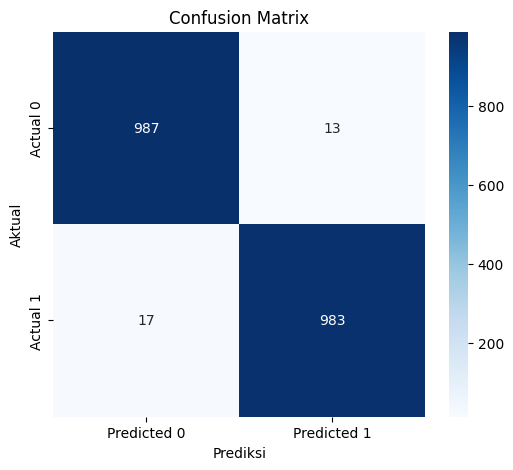

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lakukan prediksi pada data testing
y_pred = model_rf.predict(X_test)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAkurasi Model: {accuracy:.4f}")
print(f"Presisi Model: {precision:.4f}")
print(f"Recall Model: {recall:.4f}")
print(f"F1-Score Model: {f1:.4f}")

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

### Penyesuaian Hyperparameter (Hyperparameter Tuning)

**Apa itu Hyperparameter Tuning?**

Hyperparameter adalah parameter eksternal dari sebuah model yang tidak dipelajari dari data selama proses pelatihan. Contoh hyperparameter dalam Random Forest antara lain:

*   `n_estimators`: Jumlah pohon keputusan dalam hutan.
*   `max_depth`: Kedalaman maksimum setiap pohon.
*   `min_samples_split`: Jumlah sampel minimum yang diperlukan untuk membagi sebuah node internal.
*   `min_samples_leaf`: Jumlah sampel minimum yang diperlukan untuk berada di node leaf.

**Tujuan Hyperparameter Tuning:**

Tujuan dari tuning hyperparameter adalah untuk mencari kombinasi hyperparameter yang menghasilkan kinerja model terbaik pada data yang tidak terlihat (misalnya, data validasi). Ini adalah proses iteratif yang melibatkan:

1.  **Mendefinisikan ruang pencarian**: Menentukan rentang nilai yang mungkin untuk setiap hyperparameter.
2.  **Mencoba kombinasi berbeda**: Melatih dan mengevaluasi model dengan berbagai kombinasi hyperparameter.
3.  **Memilih kombinasi terbaik**: Memilih set hyperparameter yang menghasilkan metrik kinerja terbaik (misalnya, akurasi, F1-score).

**Mengapa Ini Penting?**

Meskipun model Random Forest cenderung kurang sensitif terhadap tuning hyperparameter dibandingkan algoritma lain, mengoptimalkan hyperparameter dapat:

*   **Meningkatkan kinerja model**: Walaupun model sudah baik, tuning dapat meningkatkan sedikit akurasi, presisi, recall, atau F1-score.
*   **Mengurangi *overfitting***: Dengan mengontrol parameter seperti `max_depth` atau `min_samples_leaf`, kita dapat mencegah model terlalu spesifik pada data pelatihan.
*   **Mengurangi waktu pelatihan/inferensi**: Dengan jumlah `n_estimators` yang lebih rendah tetapi optimal, kita bisa mendapatkan model yang lebih cepat tanpa mengorbankan terlalu banyak performa.

Kami akan menggunakan `GridSearchCV` atau `RandomizedSearchCV` dari `sklearn.model_selection` untuk melakukan tuning hyperparameter secara sistematis.

### Melakukan Hyperparameter Tuning dengan `RandomizedSearchCV`

`RandomizedSearchCV` dipilih karena lebih efisien daripada `GridSearchCV` ketika ruang pencarian hyperparameter besar, karena secara acak memilih subset kombinasi parameter. Ini membantu menemukan set parameter yang baik dalam waktu komputasi yang lebih singkat.

**Langkah-langkah:**

1.  **Definisikan distribusi parameter**: Tentukan rentang nilai atau pilihan untuk setiap hyperparameter yang ingin diuji.
2.  **Inisialisasi `RandomForestClassifier`**: Model dasar yang akan di-tuning.
3.  **Inisialisasi `RandomizedSearchCV`**: Konfigurasi pencarian dengan model, distribusi parameter, jumlah iterasi (`n_iter`), *cross-validation* (`cv`), dan `random_state`.
4.  **Latih pencarian**: Jalankan proses pencarian pada data pelatihan (`X_train`, `y_train`).
5.  **Tampilkan parameter terbaik dan skor terbaik**: Setelah pencarian selesai, tampilkan kombinasi hyperparameter terbaik yang ditemukan dan skor kinerja yang sesuai.

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisikan distribusi parameter untuk Random Forest
param_dist = {
    'n_estimators': randint(100, 500), # Jumlah pohon dalam hutan
    'max_depth': randint(5, 30),      # Kedalaman maksimum setiap pohon
    'min_samples_split': randint(2, 20), # Jumlah sampel minimum untuk membagi node
    'min_samples_leaf': randint(1, 10),  # Jumlah sampel minimum di node leaf
    'criterion': ['gini', 'entropy']  # Fungsi untuk mengukur kualitas pembagian
}

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Inisialisasi RandomizedSearchCV
# n_iter: jumlah iterasi (kombinasi parameter yang diuji)
# cv: jumlah fold untuk cross-validation
# scoring: metrik yang akan dioptimalkan
# n_jobs: menggunakan semua core prosesor yang tersedia
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, scoring='f1', random_state=42,
                                   n_jobs=-1, verbose=1)

# Latih pencarian pada data pelatihan
random_search.fit(X_train, y_train)

print("Hyperparameter terbaik:", random_search.best_params_)
print("F1-Score terbaik (dari cross-validation):", random_search.best_score_)

# Simpan model terbaik
best_rf_model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Hyperparameter terbaik: {'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 229}
F1-Score terbaik (dari cross-validation): 0.9820084005257016


### Evaluasi Model Terbaik Setelah Tuning

Setelah menemukan set hyperparameter terbaik menggunakan `RandomizedSearchCV`, kita akan mengevaluasi performa model Random Forest yang telah dioptimalkan ini pada *testing set* (`X_test`, `y_test`). Langkah ini krusial untuk memverifikasi apakah tuning hyperparameter benar-benar menghasilkan peningkatan kinerja dan bahwa model masih dapat bergeneralisasi dengan baik.

Kita akan menggunakan metrik evaluasi yang sama seperti sebelumnya (Akurasi, Presisi, Recall, F1-Score, dan Confusion Matrix) untuk membandingkan performa model sebelum dan sesudah tuning.


--- Hasil Evaluasi Model Random Forest Setelah Tuning ---
Akurasi Model (Tuned): 0.9845
Presisi Model (Tuned): 0.9860
Recall Model (Tuned): 0.9830
F1-Score Model (Tuned): 0.9845


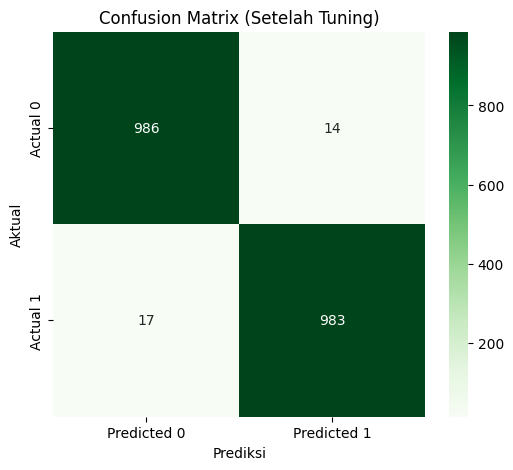

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Lakukan prediksi dengan model terbaik pada data testing
y_pred_tuned = best_rf_model.predict(X_test)

# Hitung metrik evaluasi untuk model yang sudah di-tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)

print(f"\n--- Hasil Evaluasi Model Random Forest Setelah Tuning ---")
print(f"Akurasi Model (Tuned): {accuracy_tuned:.4f}")
print(f"Presisi Model (Tuned): {precision_tuned:.4f}")
print(f"Recall Model (Tuned): {recall_tuned:.4f}")
print(f"F1-Score Model (Tuned): {f1_tuned:.4f}")

# Visualisasi Confusion Matrix untuk model yang sudah di-tuning
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (Setelah Tuning)')
plt.show()

### Interpretasi Hasil Evaluasi

Berdasarkan hasil evaluasi:

*   **Akurasi** yang tinggi menunjukkan bahwa model Anda secara keseluruhan sangat baik dalam membuat prediksi yang benar.
*   **Presisi** yang tinggi mengindikasikan bahwa ketika model memprediksi sebuah situs sebagai phishing (kelas 1), kemungkinan besar prediksi tersebut benar.
*   **Recall** yang tinggi menunjukkan bahwa model sangat baik dalam mengidentifikasi sebagian besar situs phishing yang sebenarnya.
*   **F1-Score** yang tinggi menunjukkan keseimbangan yang baik antara presisi dan recall, yang penting dalam kasus klasifikasi biner seperti deteksi phishing.

**Confusion Matrix** memberikan gambaran detail:

*   **True Positives (TP)**: Jumlah situs phishing yang benar terdeteksi sebagai phishing.
*   **True Negatives (TN)**: Jumlah situs legit yang benar terdeteksi sebagai legit.
*   **False Positives (FP)**: Jumlah situs legit yang salah diklasifikasikan sebagai phishing (Type I Error).
*   **False Negatives (FN)**: Jumlah situs phishing yang salah diklasifikasikan sebagai legit (Type II Error).

Hasil ini menunjukkan bahwa model Random Forest Anda memiliki performa yang sangat kuat dalam mengklasifikasikan situs sebagai phishing atau legit.